In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from ecephys.sglx_utils import load_timeseries
from ecephys.graham import channel_groups, paths

In [6]:
condition = "SR"
subject = "Doppio"

# chans = channel_groups.CA1[subject]
# chans = chans[0:11:2]
chans = channel_groups.full[subject]
bin_path = Path(paths.lfp_bin[condition][subject])
(times, sig, fs) = load_timeseries(bin_path, chans, start_time=(4261.8), end_time=(4261.8 + 1.0))

nChan: 385, nFileSamp: 18000019


In [89]:
# from ecephys.signal.ripples import apply_ripple_filter
# sig_filt = apply_ripple_filter(sig, fs)

In [7]:
from kcsd import KCSD1D

n_chans = len(chans)
intersite_distance = 0.020
ele_pos = np.linspace(0., (n_chans - 1) * intersite_distance, n_chans).reshape(n_chans, 1)
pots = sig.T

In [8]:
k = KCSD1D(ele_pos, pots)
est_csd = k.values('CSD')

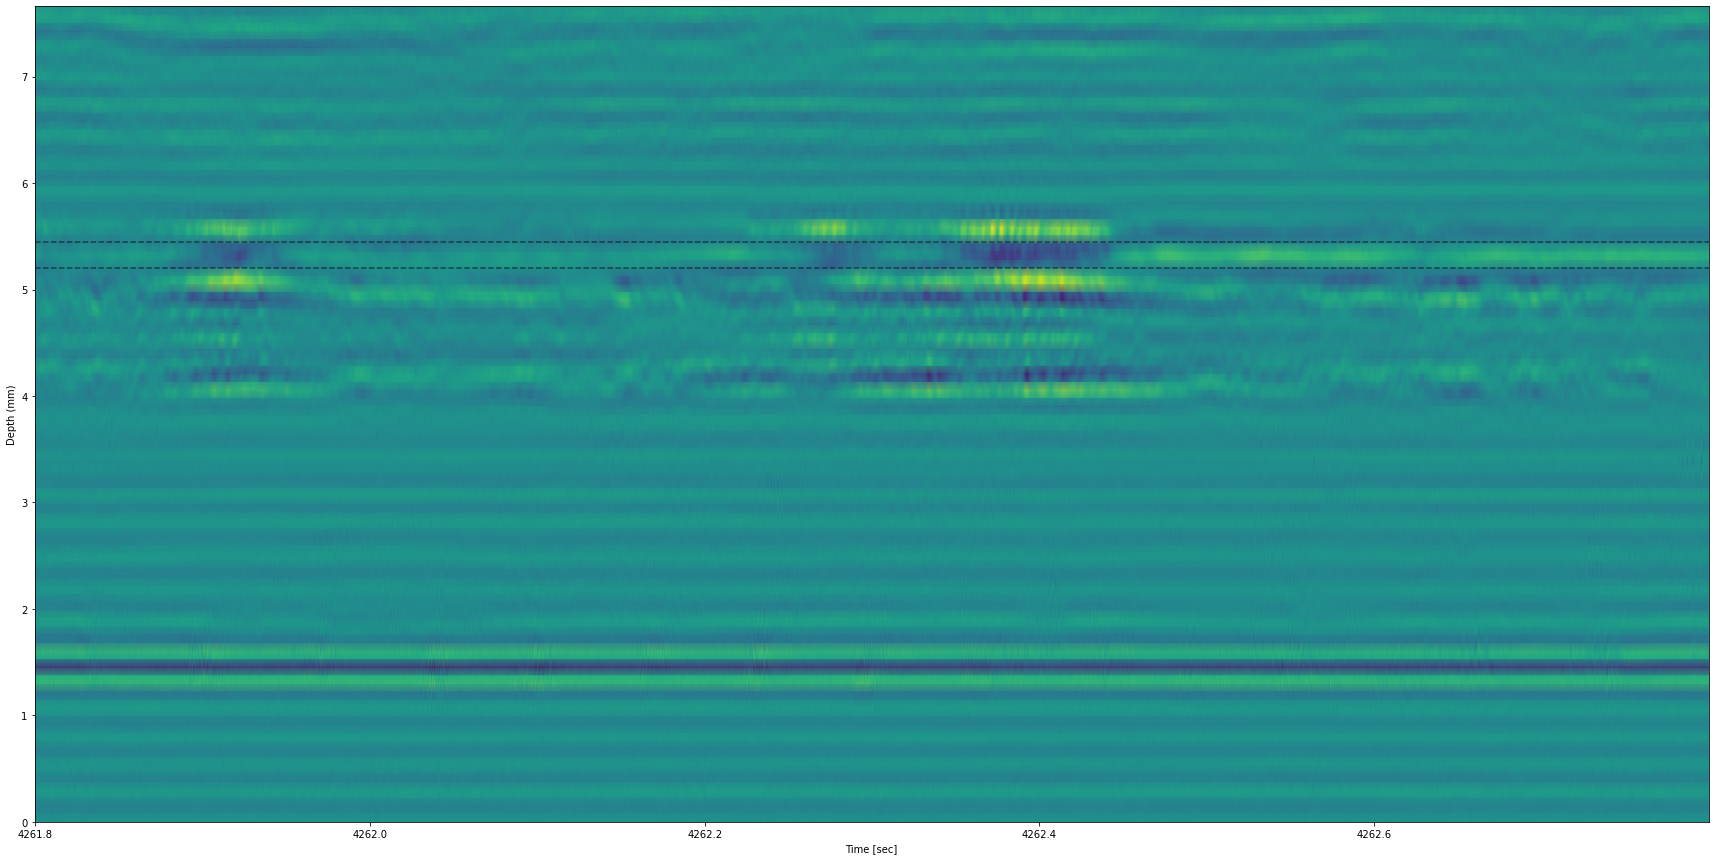

In [17]:
import matplotlib.cm as cm

_, ax = plt.subplots(figsize=(30, 15))
ax.pcolormesh(times, k.estm_x, est_csd, shading="gouraud")
ax.set_xlabel("Time [sec]")
ax.set_ylabel("Depth (mm)")
ax.axhline(5.45, alpha=0.5, color='k', linestyle="--")
ax.axhline(5.20, alpha=0.5, color='k', linestyle="--")

In [18]:
chans[np.logical_and(ele_pos >= 5.2, ele_pos <= 5.45).flatten()]

array([137, 138, 141, 142, 145, 146, 149, 150, 153, 154, 157, 158, 161])

In [19]:
np.where(np.logical_and(ele_pos >= 5.2, ele_pos <= 5.45).flatten())

(array([260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272]),)

In [21]:
chans[260:273]

array([137, 138, 141, 142, 145, 146, 149, 150, 153, 154, 157, 158, 161])

In [ ]:
k.cross_validate(Rs=np.linspace(0.01, 0.15, 15))
est_csd_val = k.values('CSD')

No lambda given, using defaults
Cross validating R (all lambda) : 0.01


In [ ]:
_, ax = plt.subplots(figsize=(30, 15))
ax.pcolormesh(times, k.estm_x, est_csd_val, shading="gouraud")
ax.set_xlabel("Time [sec]")
ax.set_ylabel("Depth (mm)")

In [ ]:
# From AllenSDK
def compute_csd(trial_mean_lfp, spacing):
    '''Compute current source density for real or virtual channels from
    a neuropixels probe.
    Compute a second spatial derivative along the probe length
    as a 1D approximation of the Laplacian, after Pitts (1952).
    Parameters
    ----------
    trial_mean_lfp: numpy.ndarray
        LFP traces surrounding presentation of a common stimulus that
        have been averaged over trials. Dimensions are channels X time samples.
    spacing : float
        Distance between channels, in millimeters. This spacing may be
        physical distances between channels or a virtual distance if channels
        have been interpolated to new virtual positions.
    Returns
    -------
    Tuple[csd, csd_channels]:
        csd : numpy.ndarray
            Current source density. Dimensions are channels X time samples.
        csd_channels: numpy.ndarray
            Array of channel indices for CSD.
    '''

    # Need to pad lfp channels for Laplacian approx.
    padded_lfp = np.pad(trial_mean_lfp,
                        pad_width=((1, 1), (0, 0)),
                        mode='edge')

    csd = (1 / (spacing ** 2)) * (padded_lfp[2:, :]
                                  - (2 * padded_lfp[1:-1, :])
                                  + padded_lfp[:-2, :])
    
    csd_channels = np.arange(0, trial_mean_lfp.shape[0])
    
    return (csd, csd_channels)

In [ ]:
est_csd_aibs, csd_channels_aibs = compute_csd(pots, intersite_distance)

In [ ]:
_, ax = plt.subplots(figsize=(30, 15))
ax.pcolormesh(times, csd_channels_aibs, est_csd_aibs, shading="gouraud")
ax.set_xlabel("Time [sec]")
ax.set_ylabel("Depth (mm)")